In [1]:
print(__doc__)

RANDOM_STATE = 42

Automatically created module for IPython interactive environment


In [2]:
from duplebalance import DupleBalanceClassifier
from duplebalance.base import sort_dict_by_key
from duplebalance.utils._plot import plot_2Dprojection_and_cardinality

from collections import Counter
import matplotlib.pyplot as plt

from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Original training dataset shape {0: 60, 1: 42, 2: 131, 3: 257, 4: 510}
Original test dataset shape {0: 40, 1: 58, 2: 169, 3: 243, 4: 490}


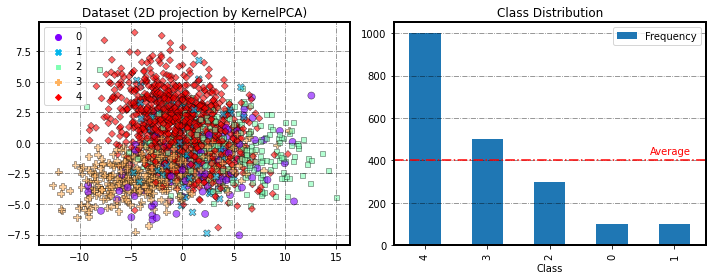

In [3]:
# Make a 5-class imbalanced classification task

X, y = make_classification(n_classes=5, class_sep=1, # 3-class
    weights=[0.05, 0.05, 0.15, 0.25, 0.5], n_informative=10, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1, n_samples=2000, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

origin_distr = sort_dict_by_key(Counter(y_train))
test_distr = sort_dict_by_key(Counter(y_test))
print('Original training dataset shape %s' % origin_distr)
print('Original test dataset shape %s' % test_distr)

# Visualize the dataset
projection = KernelPCA(n_components=2).fit(X, y)
fig = plot_2Dprojection_and_cardinality(X, y, projection=projection)
plt.show()

# Train a DupleBalance Classifier

### Basic usage of DupleBalanceClassifier

In [4]:
# Train a DupleBalanceClassifier
clf = DupleBalanceClassifier(
    n_estimators=5,
    random_state=RANDOM_STATE,
).fit(X_train, y_train)

# Predict & Evaluate
score = clf.score(X_test, y_test)
print ("DupleBalance {} | Balanced AUROC: {:.3f} | #Training Samples: {:d}".format(
    len(clf.estimators_), score, sum(clf.estimators_n_training_samples_)
    ))

DupleBalance 5 | Balanced AUROC: 0.927 | #Training Samples: 5028


### Train DupleBalanceClassifier with automatic parameter tuning

In [5]:
# Train a DupleBalanceClassifier
clf = DupleBalanceClassifier(
    n_estimators=5,
    random_state=RANDOM_STATE,
).fit(
    X_train, y_train,
    perturb_alpha='auto',
)

# Predict & Evaluate
score = clf.score(X_test, y_test)
print ("DupleBalance {} | Balanced AUROC: {:.3f} | #Training Samples: {:d}".format(
    len(clf.estimators_), score, sum(clf.estimators_n_training_samples_)
    ))

'perturb_alpha' == 'auto', auto tuning: 100%|██████████████████████████████████████████| 21/21 [00:05<00:00,  4.05it/s]


The perturb_alpha will be set to 0.650 with 0.925 balanced AUROC (validation score)
DupleBalance 5 | Balanced AUROC: 0.952 | #Training Samples: 5047


### Train DupleBalanceClassifier with advanced training log

In [6]:
# Train a DupleBalanceClassifier
clf = DupleBalanceClassifier(
    n_estimators=5,
    random_state=RANDOM_STATE,
).fit(
    X_train, y_train,
    perturb_alpha='auto',
    eval_datasets={'test': (X_test, y_test)},
    train_verbose={
        'granularity': 1,
        'print_distribution': True,
        'print_metrics': True,
    },
)

# Predict & Evaluate
score = clf.score(X_test, y_test)
print ("DupleBalance {} | Balanced AUROC: {:.3f} | #Training Samples: {:d}".format(
    len(clf.estimators_), score, sum(clf.estimators_n_training_samples_)
    ))

'perturb_alpha' == 'auto', auto tuning: 100%|██████████████████████████████████████████| 21/21 [00:05<00:00,  4.03it/s]



The perturb_alpha will be set to 0.650 with 0.925 balanced AUROC (validation score)
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃             ┃                                          ┃   Data: train   ┃   Data: test    ┃
┃ #Estimators ┃            Class Distribution            ┃     Metric      ┃     Metric      ┃
┃             ┃                                          ┃ balance-roc-auc ┃ balance-roc-auc ┃
┣━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━┫
┃      1      ┃  {0: 60, 1: 42, 2: 131, 3: 257, 4: 510}  ┃      0.813      ┃      0.767      ┃
┃      2      ┃  {0: 96, 1: 83, 2: 150, 3: 244, 4: 434}  ┃      0.910      ┃      0.846      ┃
┃      3      ┃ {0: 132, 1: 123, 2: 167, 3: 230, 4: 356} ┃      0.964      ┃      0.905      ┃
┃      4      ┃ {0: 167, 1: 163, 2: 185, 3: 217, 4: 280} ┃      0.980      ┃      0.926      ┃
┃      5      ┃ {0: 204, 1: 204, 2: 204, 3: 204, 4: 204} ┃  